# Final Project: AdaBoost
**Winter 2020**<br/>
**Team member**: <br/>Bruce-Bingfan Tian <br/>
Travis-Tiancheng Lin<br/>
Vivien-Jitian Chen

#### First we use sklearn reimplemented the content in the blog

In [1]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("training Accuracy:",metrics.accuracy_score(y_test, y_pred))

test Accuracy: 0.9777777777777777
training Accuracy: 0.9777777777777777


#### then we implement it by ourselves in binary classification

In [2]:
import numpy as np

#Adaboost分类
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
finalfeaturevalue=[]
finalalpha=[]

def calculateAlpha(error):# (Calculate classifier weight)
    if error == 0:
        return 0
    else:
        return (1/2) * (np.log((1-error)/error))

def calculateWeight(alpha, originalWeight, y, g):# (Calculate sample weight)
    weight = originalWeight * (np.e ** (-alpha * y * g))
    return weight

def sign(value):
    if value > 0:
        return 1
    else:
        return -1

def predict(x, alpha, featureValue):# (Learning function, seems to be used to determine the new weight of the sample? If the number in this column is greater than this value, it is returned (alpha greater than 0 is alpha, less than 0 is -1, and vice versa)
    if x >= featureValue:
        return sign(alpha * 1)
    else:
        return sign(alpha * -1)


def findBestCut(dataset, target, weights):
    shape = np.shape(dataset)
    featureNo = shape[1]
    newWeights = []
    for featureSeq in range(featureNo):# (featureSeq from 0 to 3)
        featureRow = dataset[:, featureSeq]# (FeatureRow columns 0-3)
        for featureIndex in range(len(featureRow)):# (FeatureIndex from 0-149)
            featureValue = featureRow[featureIndex]# (Each column is traversed from 1-150 values)
            resultRow = featureRow.copy()# (Copied this column in this loop)
            for index in range(len(resultRow)):# (Each column is traversed from 1-150 values)
                if resultRow[index] >= featureValue:# (If else statement compares each number in this column with a fixed number to generate a weak classifier)
                    resultRow[index] = 1
                else:
                    resultRow[index] = -1
            error = np.dot(np.multiply(resultRow, target), weights.T)# (Calculate error)
           
            if error < 0.5:# (Calculate weight when error is qualified
                alpha = calculateAlpha(error)# (Call the calculation error function)
                #print('alpha is :' + str(alpha))# (Output alpha value, that is, the value of the classifier weight)
                for weightNo in range(len(weights)):# (The loop is still from 0-149)
                    g = predict(featureRow[weightNo], alpha, featureValue)# (Ie weak classifier, the answer is 1 or -1, the learn function calls the sign function, so the result is still 1 or -1)
                    newWeights.append(calculateWeight(alpha, weights[weightNo], target[weightNo], g))# (Calculate new weight)
                newWeights = newWeights / sum(newWeights)# (Normalize the new weights so that their sum is 1)
                return featureValue, alpha, newWeights# (Return the split node and weight))
        return None, None, newWeights

    # newWeights = newWeights/sum(newWeights)
    #
    # return featureValue, alpha, newWeights


def adaBoost(dataset,target,weekClassifierNo):
    shape = np.shape(dataset)
    recordNo = shape[0]
    weights = np.ones(recordNo)/recordNo
    featureNo = shape[1]
    weekClassifiers = {}
    for classifierSeq in range(weekClassifierNo):
        featureValue, alpha, newWeights = findBestCut(dataset, target, weights)
        if len(newWeights) == 0:
            break
        weekClassifiers["WClassifier" + str(classifierSeq)] = [featureNo, featureValue, alpha]# (Iteratively generate new weak classifiers
        weights = newWeights#After generating once, update the sample weights (for example, after generating the first weak classifier, strengthen the points that the weak classifier failed to classify
        finalfeaturevalue.append(featureValue)
        finalalpha.append(alpha)
    return weekClassifiers

iris = load_iris()
iris.target[iris.target > 0] = 1# (Data preprocessing, that is, turning the data into two categories
iris.target[iris.target == 0] = -1
weekClassifiers = adaBoost(iris.data, iris.target,6)
print("FinalFeatureValue:",finalfeaturevalue)
print("FinalAlpha:",finalalpha)

FinalFeatureValue: [4.7, 4.9, 4.9, 4.9, 5.1, 5.1]
FinalAlpha: [0.09360577104407318, 0.03509886861946353, 0.09009038757777413, 0.24307972442062353, 0.1719016528852874, 0.5145727335107229]


#### In this part we print out the final result.  Here are the final classifier and the accuracy we got.

In [3]:
featureRow = iris.data[:, 0]
#print(featureRow)
resultRow = featureRow.copy()
#print(resultRow)
finalrow=[]
count=0
for i in range(150):
    finalrow.append(0)
for featureIndex in range(len(finalfeaturevalue)):
    featureValue = finalfeaturevalue[featureIndex]
    #print(featureValue)
    for index in range(len(resultRow)):
        if resultRow[index] >= featureValue:
            finalrow[index]+=1*finalalpha[featureIndex]
        else:
            finalrow[index]+=-1*finalalpha[featureIndex]
#print(finalrow)
for finalindex in range(150):
    if finalrow[finalindex]>=0:
        finalrow[finalindex]=1
    else:
        finalrow[finalindex]=-1 
for finalindex in range(150):
    if (finalrow[finalindex]==iris.target[finalindex]):
        count=count+1
print("Accuracy:",count/150)
print("Prediction:",finalrow)

Accuracy: 0.8266666666666667
Prediction: [1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


#### Here we get the final classifier and the accuracy

####  Then we tried to use another dataset which is more complex, we chose the bicycle dataset from HW1 and HW2, we preprocessed it into classification problem.

In [30]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [5]:
train_df = pd.read_csv('./Bikeshare_train.csv').drop('Unnamed: 0', axis=1)
test_df = pd.read_csv('./Bikeshare_test.csv').drop('Unnamed: 0', axis=1)
# Get categorical attributes
categorical_columns = ['season', 'month', 'holiday', 'day_of_week', 'workingday', 'weather']
categorical_columns_g2cols = ['season', 'month', 'day_of_week', 'weather']

# Numerical attributes
numerical_columns = ['temp', 'atemp', 'humidity', 'windspeed']

# Convert categorical attributes
train_df = pd.get_dummies(train_df, columns=categorical_columns_g2cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_columns_g2cols, drop_first=True)
test_df.head()

# Compute mean and std of training data
mean = train_df[numerical_columns].mean()
std = train_df[numerical_columns].std()

# Scale the training data and test data by mean and std of training data
train_df[numerical_columns] = (train_df[numerical_columns] - mean)/std
test_df[numerical_columns] = (test_df[numerical_columns] - mean)/std

# Summarize
train_df.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2.0,season_3.0,season_4.0,...,month_11.0,month_12.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,weather_2.0,weather_3.0
count,331.000000,331.000000,3.310000e+02,3.310000e+02,3.310000e+02,3.310000e+02,331.000000,331.000000,331.000000,331.000000,...,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,0.033233,0.670695,-6.976628e-17,-1.227618e-16,-7.808457e-16,1.543579e-15,4598.447130,0.259819,0.265861,0.256798,...,0.093656,0.066465,0.175227,0.135952,0.123867,0.123867,0.145015,0.135952,0.329305,0.030211
std,0.179515,0.470672,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1935.319338,0.439199,0.442459,0.437528,...,0.291790,0.249471,0.380736,0.343256,0.329929,0.329929,0.352649,0.343256,0.470672,0.171428
min,0.000000,0.000000,-2.503291e+00,-2.572131e+00,-2.648736e+00,-2.152869e+00,431.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.504011e-01,-8.603176e-01,-7.452412e-01,-7.381149e-01,3370.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,8.772587e-02,1.466312e-01,-6.562743e-03,-1.579037e-01,4648.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,8.024892e-01,7.508005e-01,7.055719e-01,5.693478e-01,5981.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.874634e+00,1.959139e+00,2.362380e+00,2.949989e+00,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
import warnings
warnings.filterwarnings("ignore")
train_df['count'][train_df['count'].values >6000] = 3
train_df['count'][train_df['count'].values >4000] = 2
train_df['count'][train_df['count'].values >2000] = 1
train_df['count'][train_df['count'].values >100] = 0
Xtrain = train_df[['temp','humidity']].values # append column of ones to attributes
ytrain = train_df['count'].values.reshape(-1,1)

Xtest = test_df.drop('count', axis=1).values
ytest = test_df['count'].values.reshape(-1,1)
ytrain

array([[3.],
       [3.],
       [3.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [2.],
       [2.],
       [1.],
       [3.],
       [2.],
       [3.],
       [1.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [3.],
       [0.],
       [3.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [2.],
       [2.],
       [2.],
       [2.],
       [3.],
       [3.],
       [3.],
       [1.],
       [2.],
       [2.],
       [3.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [3.],
       [1.],
       [2.],
       [3.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],

In [7]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# Load data
X = Xtrain
y = ytrain

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=500,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 2. 2. 2. 2. 1. 2.
 1. 1. 2. 0. 1. 1. 1. 1. 0. 1. 2. 1. 1. 2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2.
 2. 1. 1. 2. 2. 1. 1. 2. 1. 0. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1.
 1. 1. 1. 1.]
Accuracy: 0.32


Score:0.4984894259818731
Score:0.5317220543806647
Score:0.5317220543806647
Score:0.552870090634441
Score:0.540785498489426
Score:0.5317220543806647


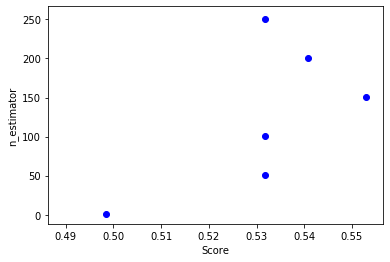

In [8]:
score = []
for i in range(1,300,50):
    adbt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                          algorithm="SAMME", n_estimators=i, learning_rate=0.5)

    adbt.fit(X, y)
    x = adbt.score(X, y)
    score.append(x)
    print("Score:{}".format(adbt.score(X, y)))
    plt.scatter(adbt.score(X, y), i, color = "b")
    plt.xlabel("Score")
    plt.ylabel("n_estimator")

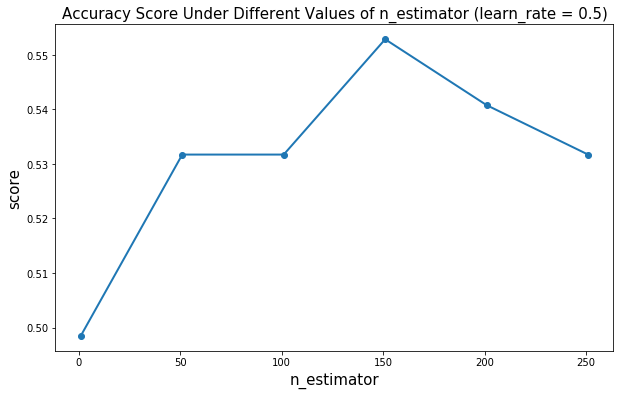

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111)
fig.set_size_inches(10,6)

ax.plot(range(1,300,50) ,score, 'o-', linewidth=2)

ax.set_title('Accuracy Score Under Different Values of n_estimator (learn_rate = 0.5)', fontsize = 15)

ax.set_xlabel('n_estimator',fontsize = 15)
ax.set_ylabel('score',fontsize = 15)

plt.show()

In [10]:
score = []
learn_rate = [0.001,0.01,0.05,0.1,0.2]
for i in learn_rate:
    adbt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                          algorithm="SAMME", n_estimators=300, learning_rate=i)

    adbt.fit(X, y)
    x = adbt.score(X, y)
    score.append(x)
    print("When learning rate = {} n_estimator = 6, score = {}".format(i, adbt.score(X, y)))

When learning rate = 0.001 n_estimator = 6, score = 0.4773413897280967
When learning rate = 0.01 n_estimator = 6, score = 0.5045317220543807
When learning rate = 0.05 n_estimator = 6, score = 0.5166163141993958
When learning rate = 0.1 n_estimator = 6, score = 0.5166163141993958
When learning rate = 0.2 n_estimator = 6, score = 0.5438066465256798


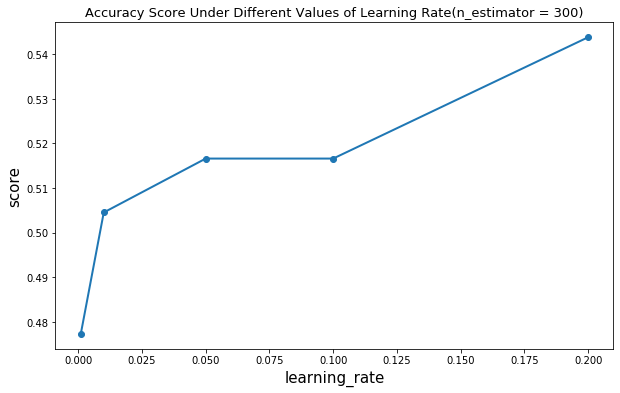

In [11]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111)
fig.set_size_inches(10,6)

ax.plot(learn_rate ,score,  'o-', linewidth=2)

ax.set_title('Accuracy Score Under Different Values of Learning Rate(n_estimator = 300)',fontsize = 13)

ax.set_xlabel('learning_rate',fontsize = 15)
ax.set_ylabel('score',fontsize = 15)

plt.show()

####  It's a whole disaster, we think it's because the dataset is too complicated and we need to find the predictors which are more suitible for classification.  Then we draw some pictures of the Iris dataset.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.font_manager import FontProperties
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

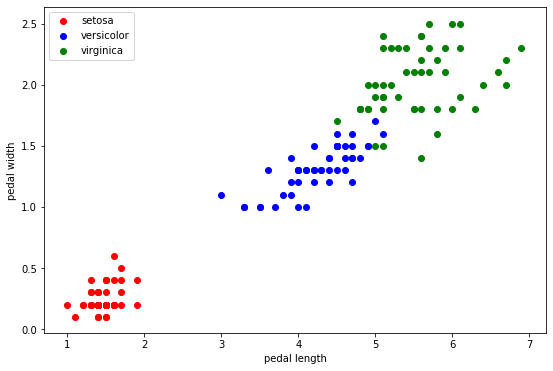

In [13]:
#iris = load_iris()
x = iris.data[:,2:]#取后两个特征
y = iris.target
plt.figure(figsize=(9,6))
plt.scatter(x[y==0,0],x[y==0,1],color='red',marker='o',label = "setosa")#取特征第0,1，（原特征里是3,4列），绘制类别为0的，颜色red
plt.scatter(x[y==1,0],x[y==1,1],color='blue',marker='o',label = "versicolor")#取特征第0,1列，绘制类别为1的，颜色blue
plt.scatter(x[y==2,0],x[y==2,1],color='green',marker='o', label = "virginica")#取特征第0,1列，绘制类别为2的，颜色green

plt.xlabel('pedal length')
plt.ylabel('pedal width')

plt.legend()
plt.show()

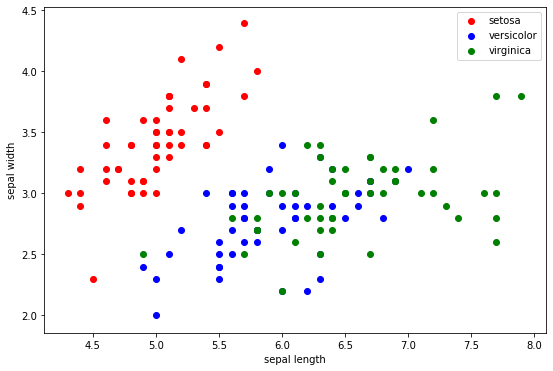

In [14]:
iris = load_iris()
x = iris.data[:,:2]#取后两个特征
y = iris.target
plt.figure(figsize=(9,6))
plt.scatter(x[y==0,0],x[y==0,1],color='red',marker='o',label = "setosa")#取特征第0,1，（原特征里是3,4列），绘制类别为0的，颜色red
plt.scatter(x[y==1,0],x[y==1,1],color='blue',marker='o',label = "versicolor")#取特征第0,1列，绘制类别为1的，颜色blue
plt.scatter(x[y==2,0],x[y==2,1],color='green',marker='o', label = "virginica")#取特征第0,1列，绘制类别为2的，颜色green

plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.legend()
plt.show()

####  Then we try to get weak classifiers

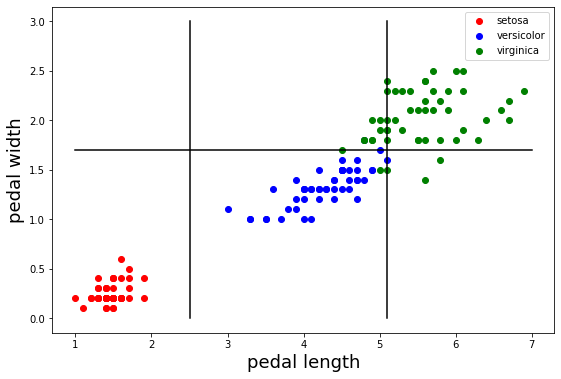

In [15]:
x = iris.data[:,2:]#取后两个特征
y = iris.target
#xgrid=5.7
plt.figure(figsize=(9,6))
plt.scatter(x[y==0,0],x[y==0,1],color='red',marker='o',label = "setosa")#取特征第0,1，（原特征里是3,4列），绘制类别为0的，颜色red
plt.scatter(x[y==1,0],x[y==1,1],color='blue',marker='o',label = "versicolor")#取特征第0,1列，绘制类别为1的，颜色blue
plt.scatter(x[y==2,0],x[y==2,1],color='green',marker='o', label = "virginica")#取特征第0,1列，绘制类别为2的，颜色green

plt.plot([2.5,2.5],[0,3], color = 'black')
plt.plot([1,7],[1.7,1.7], color = 'black')
plt.plot([5.1,5.1],[0,3], color = 'black')
plt.xlabel('pedal length',fontsize=18)
plt.ylabel('pedal width',fontsize=18)

plt.legend()
plt.show()

In [16]:
X = iris.data[:, [2, 3]]
y = iris.target

label_list = ['setosa', 'veriscolor', 'virginica']

In [17]:
def plot_decision_regions(X, y, classifier=None):
    marker_list = ['o', 'o', 'o']
    color_list = ['r', 'b', 'g']
    cmap = ListedColormap(color_list[:len(np.unique(y))])
    plt.figure(figsize=(9,6))
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    t1 = np.linspace(x1_min, x1_max, 666)
    t2 = np.linspace(x2_min, x2_max, 666)

    x1, x2 = np.meshgrid(t1, t2)
    y_hat = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
    y_hat = y_hat.reshape(x1.shape)
    plt.contourf(x1, x2, y_hat, alpha=0.2, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    plt.ylim(0,3.5)

    for ind, clas in enumerate(np.unique(y)):
        plt.scatter(X[y == clas, 0], X[y == clas, 1], alpha=0.8, s=50,
                    c=color_list[ind], marker=marker_list[ind], label=label_list[clas])

In [18]:
adbt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                          algorithm="SAMME", n_estimators=10, learning_rate=0.8)
adbt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                              

#### Here we use sklearn to visualize the classification of iris dataset

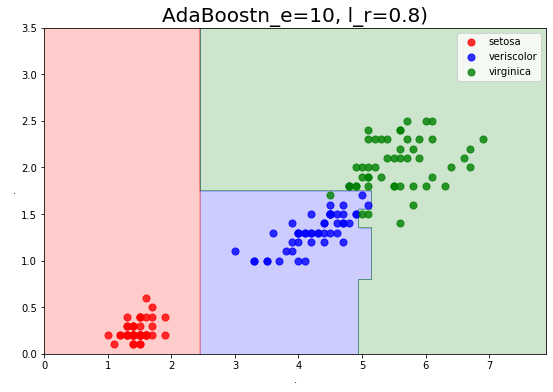

In [19]:
plot_decision_regions(X, y, classifier=adbt)
plt.xlabel('.')
plt.ylabel('.')
plt.title('AdaBoostn_e=10, l_r=0.8)',
           fontsize=20)
plt.legend()
plt.show()

Score:0.96
Score:0.9933333333333333
Score:0.9933333333333333
Score:0.9933333333333333
Score:0.9933333333333333
Score:0.9933333333333333


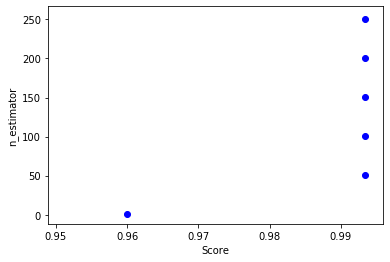

In [20]:
score = []#get the score of each iteration
for i in range(1,300,50):
    adbt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                          algorithm="SAMME", n_estimators=i, learning_rate=0.5)

    adbt.fit(X, y)
    x = adbt.score(X, y)
    score.append(x)
    print("Score:{}".format(adbt.score(X, y)))
    plt.scatter(adbt.score(X, y), i, color = "b")
    plt.xlabel("Score")
    plt.ylabel("n_estimator")

### Get Accuracy Score Under Different Values of n_estimator

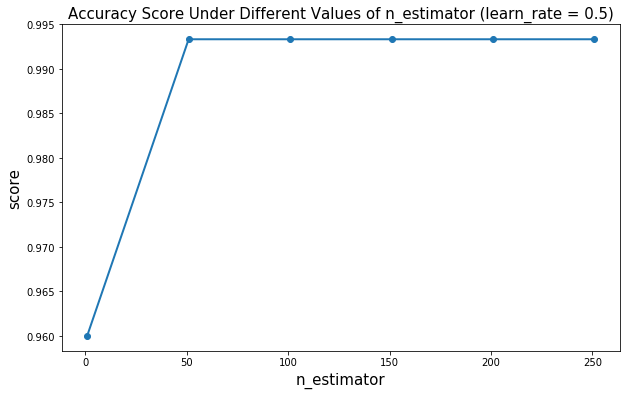

In [21]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111)
fig.set_size_inches(10,6)

ax.plot(range(1,300,50) ,score, 'o-', linewidth=2)

ax.set_title('Accuracy Score Under Different Values of n_estimator (learn_rate = 0.5)', fontsize = 15)

ax.set_xlabel('n_estimator',fontsize = 15)
ax.set_ylabel('score',fontsize = 15)

plt.show()

### Get Accuracy Score Under Different Values of Learning Rate

In [22]:
score = []
learn_rate = [0.001,0.01,0.05,0.1,0.2]
for i in learn_rate:
    adbt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                          algorithm="SAMME", n_estimators=300, learning_rate=i)

    adbt.fit(X, y)
    x = adbt.score(X, y)
    score.append(x)
    print("When learning rate = {} n_estimator = 6, score = {}".format(i, adbt.score(X, y)))

When learning rate = 0.001 n_estimator = 6, score = 0.9533333333333334
When learning rate = 0.01 n_estimator = 6, score = 0.9666666666666667
When learning rate = 0.05 n_estimator = 6, score = 0.9733333333333334
When learning rate = 0.1 n_estimator = 6, score = 0.9933333333333333
When learning rate = 0.2 n_estimator = 6, score = 0.9933333333333333


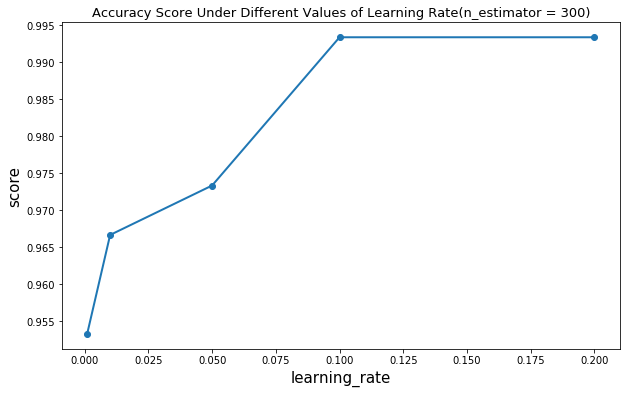

In [23]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111)
fig.set_size_inches(10,6)

ax.plot(learn_rate ,score,  'o-', linewidth=2)

ax.set_title('Accuracy Score Under Different Values of Learning Rate(n_estimator = 300)',fontsize = 13)

ax.set_xlabel('learning_rate',fontsize = 15)
ax.set_ylabel('score',fontsize = 15)

plt.show()

#### We find out pedal predictors which are not complex enough, so we choose other predictors, sepal length and sepal width, to verify our results.

In [24]:
X = iris.data[:, [0,1]]
y = iris.target
label_list = ['setosa', 'veriscolor', 'virginica']

In [25]:
def plot_decision_regions(X, y, classifier=None):
    marker_list = ['o', 'o', 'o']
    color_list = ['r', 'b', 'g']
    cmap = ListedColormap(color_list[:len(np.unique(y))])
    plt.figure(figsize=(9,6))
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    t1 = np.linspace(x1_min, x1_max, 666)
    t2 = np.linspace(x2_min, x2_max, 666)

    x1, x2 = np.meshgrid(t1, t2)
    y_hat = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T)
    y_hat = y_hat.reshape(x1.shape)
    plt.contourf(x1, x2, y_hat, alpha=0.2, cmap=cmap)
    plt.xlim(x1_min, x1_max)
    #plt.ylim(0,3.5)

    for ind, clas in enumerate(np.unique(y)):
        plt.scatter(X[y == clas, 0], X[y == clas, 1], alpha=0.8, s=50,
                    c=color_list[ind], marker=marker_list[ind], label=label_list[clas])

In [26]:
adbt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                          algorithm="SAMME", n_estimators=10, learning_rate=0.8)
adbt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=5,
                                                         min_samples_split=20,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                              

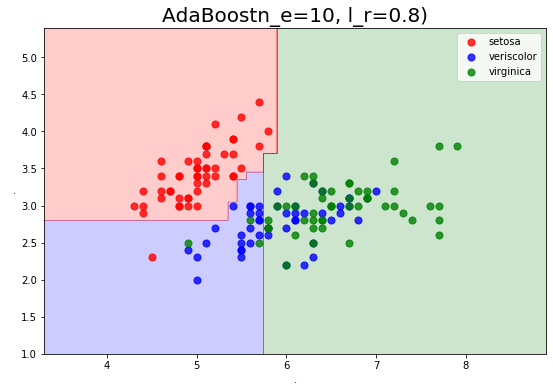

In [27]:
plot_decision_regions(X, y, classifier=adbt)
plt.xlabel('.')
plt.ylabel('.')
plt.title('AdaBoostn_e=10, l_r=0.8)',
           fontsize=20)
plt.legend()
plt.show()

Score:0.7733333333333333
Score:0.7866666666666666
Score:0.7866666666666666
Score:0.7933333333333333
Score:0.7933333333333333
Score:0.7933333333333333
Score:0.7933333333333333
Score:0.8
Score:0.8
Score:0.8066666666666666
Score:0.8066666666666666
Score:0.8066666666666666
Score:0.8066666666666666
Score:0.8066666666666666
Score:0.8066666666666666
Score:0.8066666666666666
Score:0.8133333333333334
Score:0.8133333333333334
Score:0.8133333333333334
Score:0.8133333333333334
Score:0.8133333333333334
Score:0.8133333333333334
Score:0.8133333333333334


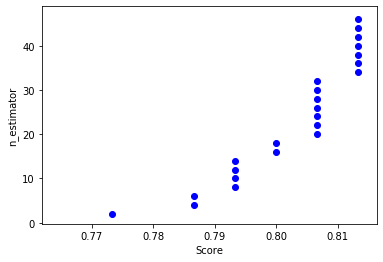

In [28]:
score = []
for i in range(2,48, 2):
    adbt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20, min_samples_leaf=5),
                          algorithm="SAMME", n_estimators=i, learning_rate=0.4)

    adbt.fit(X, y)
    x = adbt.score(X, y)
    score.append(x)
    print("Score:{}".format(adbt.score(X, y)))
    plt.scatter(adbt.score(X, y), i, color = "b")
    plt.xlabel("Score")
    plt.ylabel("n_estimator")

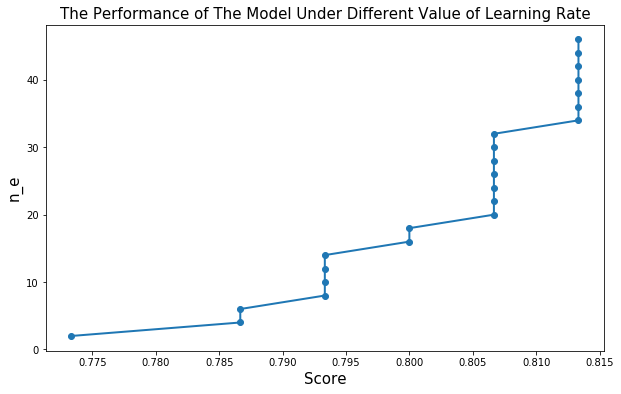

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111)
fig.set_size_inches(10,6)

ax.plot(score, range(2,48,2) , 'o-', linewidth=2)

ax.set_title('The Performance of The Model Under Different Value of Learning Rate',fontsize = 15)

ax.set_xlabel('Score',fontsize = 15)
ax.set_ylabel('n_e',fontsize = 15)

plt.show()